# HR Analytics project

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("HR Analytics.csv")

# EDA

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
df.isnull().sum()

#there are no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#pip install pandas-profiling

In [10]:
#from pandas_profiling import ProfileReport

In [11]:
#pre_profile = df.profile_report(title="HR Analytics")

In [12]:
#pre_profile

In [13]:
#checking object datatype columns

df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [14]:
#displaying unique values and their value counts in every object type column

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())
    print('\n')

Attrition
['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department
['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender
['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Re

In [15]:
#converting object datatype columns into numeric columns by encoding
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [16]:
df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 
    'OverTime']]       =        oe.fit_transform (df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 
    'OverTime']])

Age


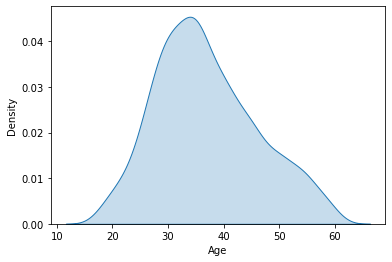

Attrition


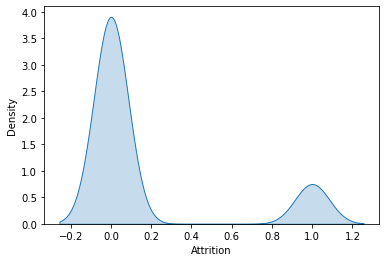

BusinessTravel


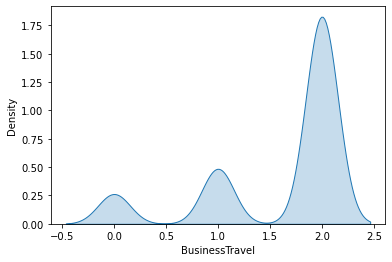

DailyRate


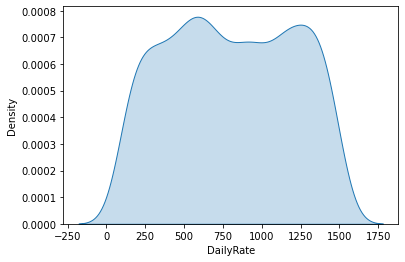

Department


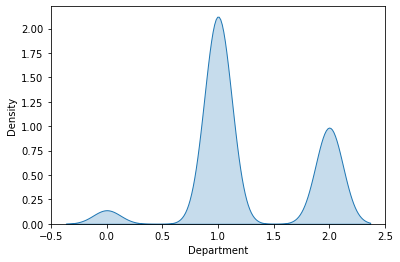

DistanceFromHome


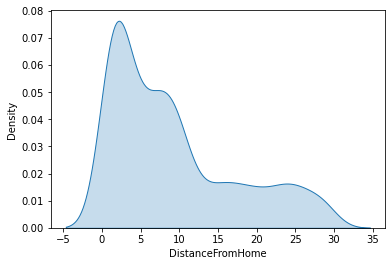

Education


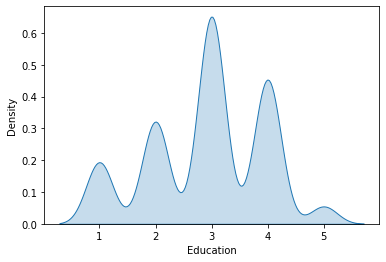

EducationField


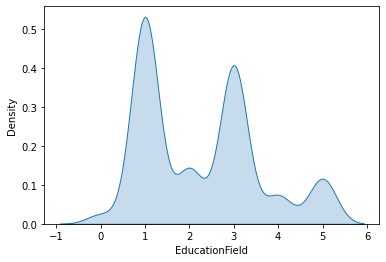

EmployeeCount


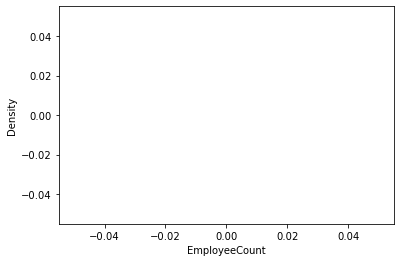

EmployeeNumber


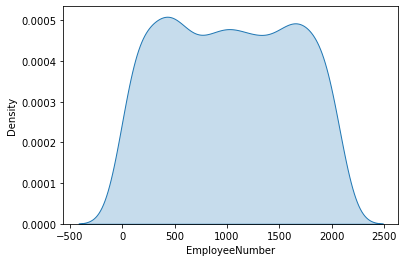

EnvironmentSatisfaction


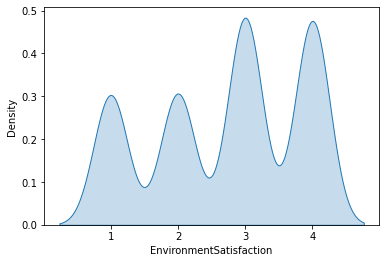

Gender


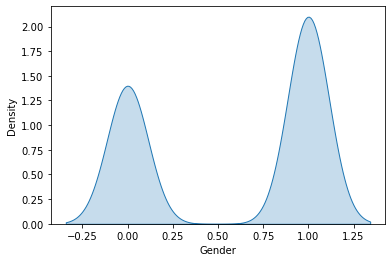

HourlyRate


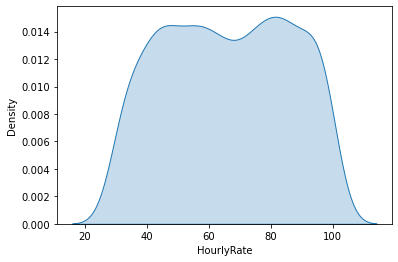

JobInvolvement


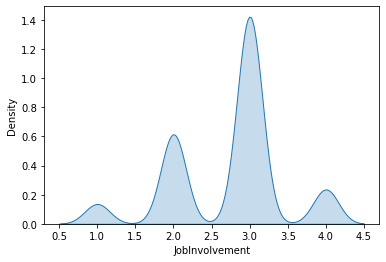

JobLevel


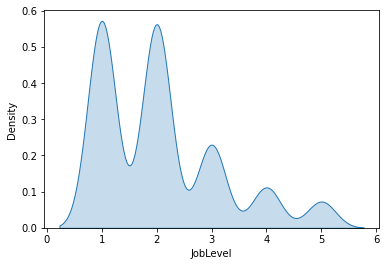

JobRole


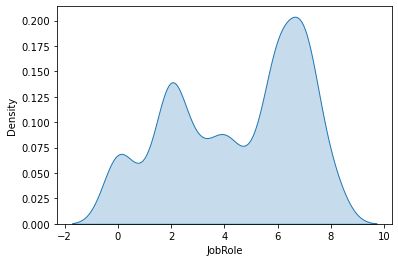

JobSatisfaction


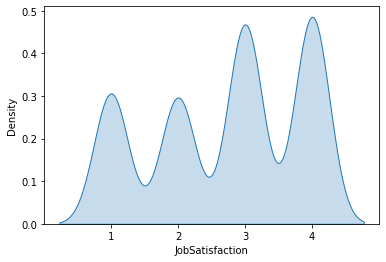

MaritalStatus


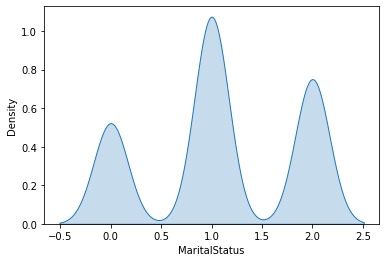

MonthlyIncome


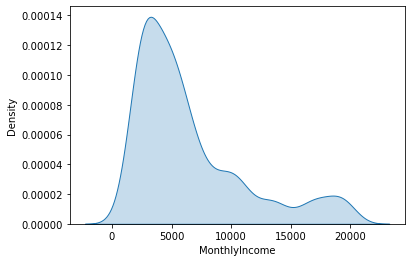

MonthlyRate


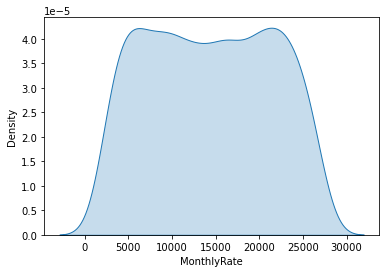

NumCompaniesWorked


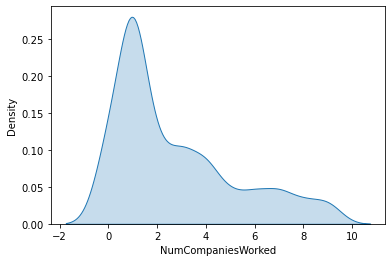

Over18


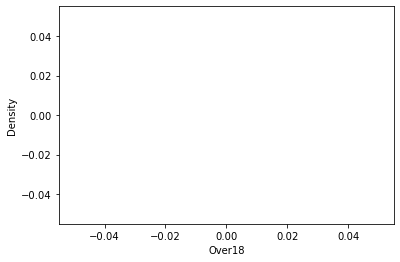

OverTime


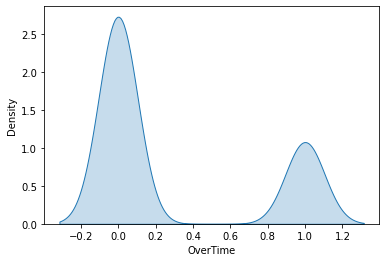

PercentSalaryHike


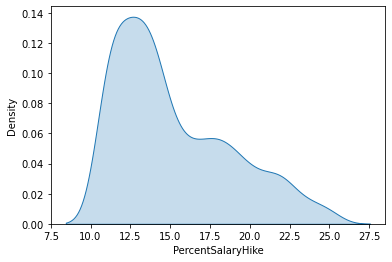

PerformanceRating


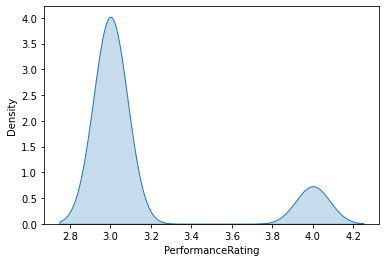

RelationshipSatisfaction


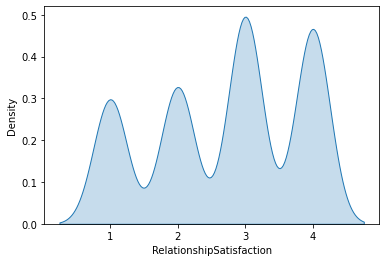

StandardHours


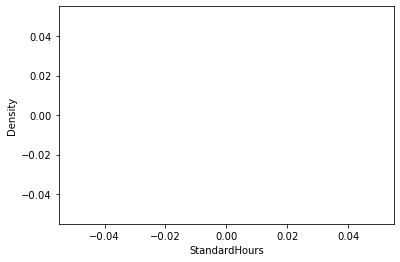

StockOptionLevel


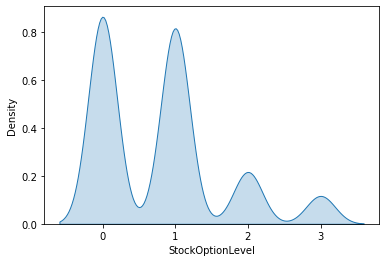

TotalWorkingYears


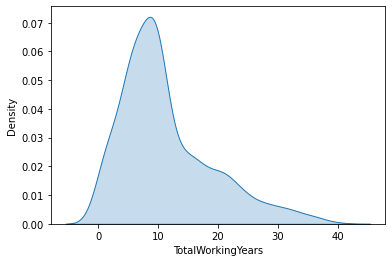

TrainingTimesLastYear


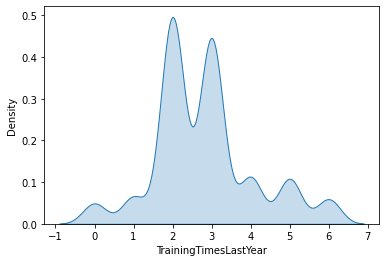

WorkLifeBalance


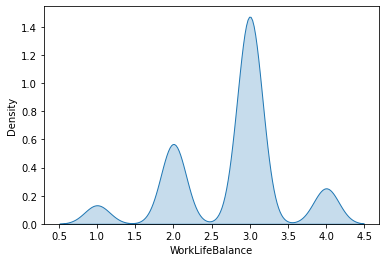

YearsAtCompany


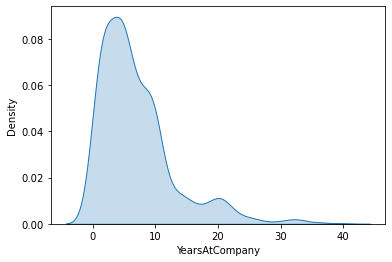

YearsInCurrentRole


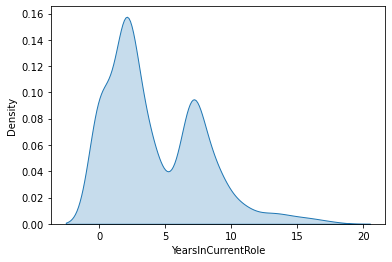

YearsSinceLastPromotion


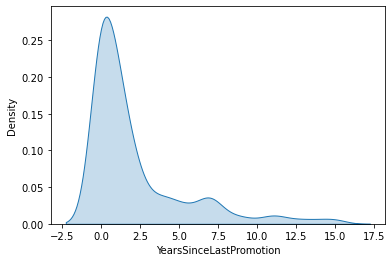

YearsWithCurrManager


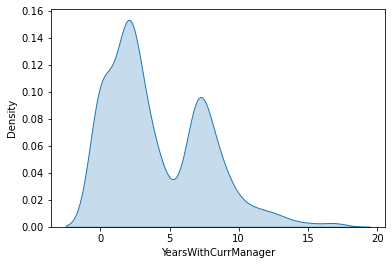

In [18]:
for col in df:
    print(col)
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()
    
#We see that distribution is uneven, this means data imbalance. 

In [30]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [32]:
df['Over18'].value_counts()

0.0    1470
Name: Over18, dtype: int64

In [31]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [33]:
#we see that 'EmployeeCount', 'Over18', 'StandardHours' have only one value in all columns hence we can drop these columns. 

df.drop(labels = ['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace=True)

Handling outliers

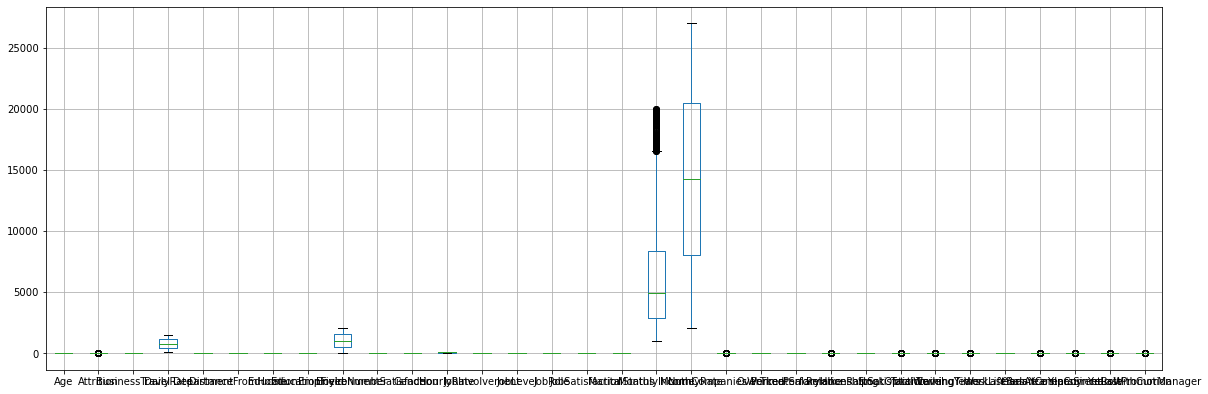

In [35]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()
    
# we can observe from boxplot that outliers are present.

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [37]:
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EmployeeNumber  \
0             1.010909   0.891688        0.937414        1.701283   
1             0.147150   1.868426        0.937414        1.699621   
2             0.887515   0.891688        1.316673        1.696298   
3             0.764121   1.061787        0.937414        1.694636   
4             0.887515   1.868426        0.565311        1.691313   
...                ...        ...             ...             ...   
1465          1.703764   0.891688        0.565311        1.721670   
1466          0.393938   1.868426        0.565311        1.723332   
1467          0.640727   0.085049        0.937414        1.726655   
1468          0.887515   0.085049        0.565311        1.728317   
1469          0.147150   0.085049        0.565311        1.733302   

      EnvironmentSatisfaction  ...  PerformanceRating  \
0                    0.660531  ...           0.426230   
1                    0.254625  ...           2.346151   
2                    1.169781  ...           0.426230   
3                    1.169781  ...           0.426230   
4                    1.575686  ...           0.426230   
...                       ...  ...                ...   
1465                 0.254625  ...           0.426230   
1466                 1.169781  ...           0.426230   
1467                 0.660531  ...           2.346151   
1468                 1.169781  ...           0.426230   
1469                 0.660531  ...           0.426230   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                     1.584178          0.932014           0.421642   
1                     1.191438          0.241988           0.164511   
2                     0.658973          0.932014           0.550208   
3                     0.266233          0.932014           0.421642   
4                     1.191438          0.241988           0.678774   
...                        ...               ...                ...   
1465                  0.266233          0.241988           0.735447   
1466                  1.584178          0.241988           0.293077   
1467                  0.658973          0.241988           0.678774   
1468                  1.191438          0.932014           0.735447   
1469                  1.584178          0.932014           0.678774   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  2.171982         2.493820        0.164613   
1                  0.155707         0.338096        0.488508   
2                  0.155707         0.338096        1.144294   
3                  0.155707         0.338096        0.161947   
4                  0.155707         0.338096        0.817734   
...                     ...              ...             ...   
1465               0.155707         0.338096        0.327893   
1466               1.707500         0.338096        0.001333   
1467               2.171982         0.338096        0.164613   
1468               0.155707         1.077862        0.325228   
1469               0.155707         1.754054        0.491174   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWi

In [38]:
new_df.shape

(1387, 32)

In [39]:
df.shape

(1470, 32)

In [41]:
dataloss = ((1470-1387)/1470)*100
dataloss

#dataloss is less than 7% hence we can drop the outliers

5.646258503401361

In [42]:
df = new_df

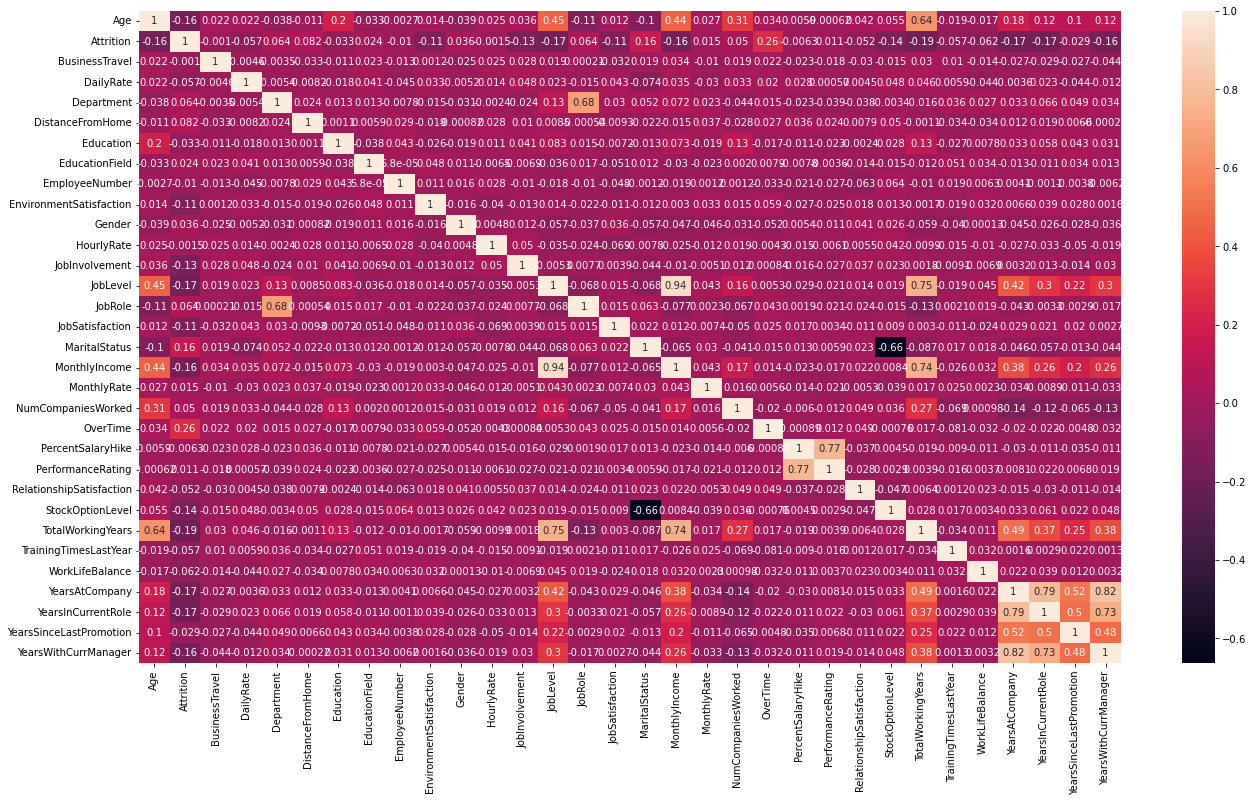

In [44]:
#correlation graph

plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

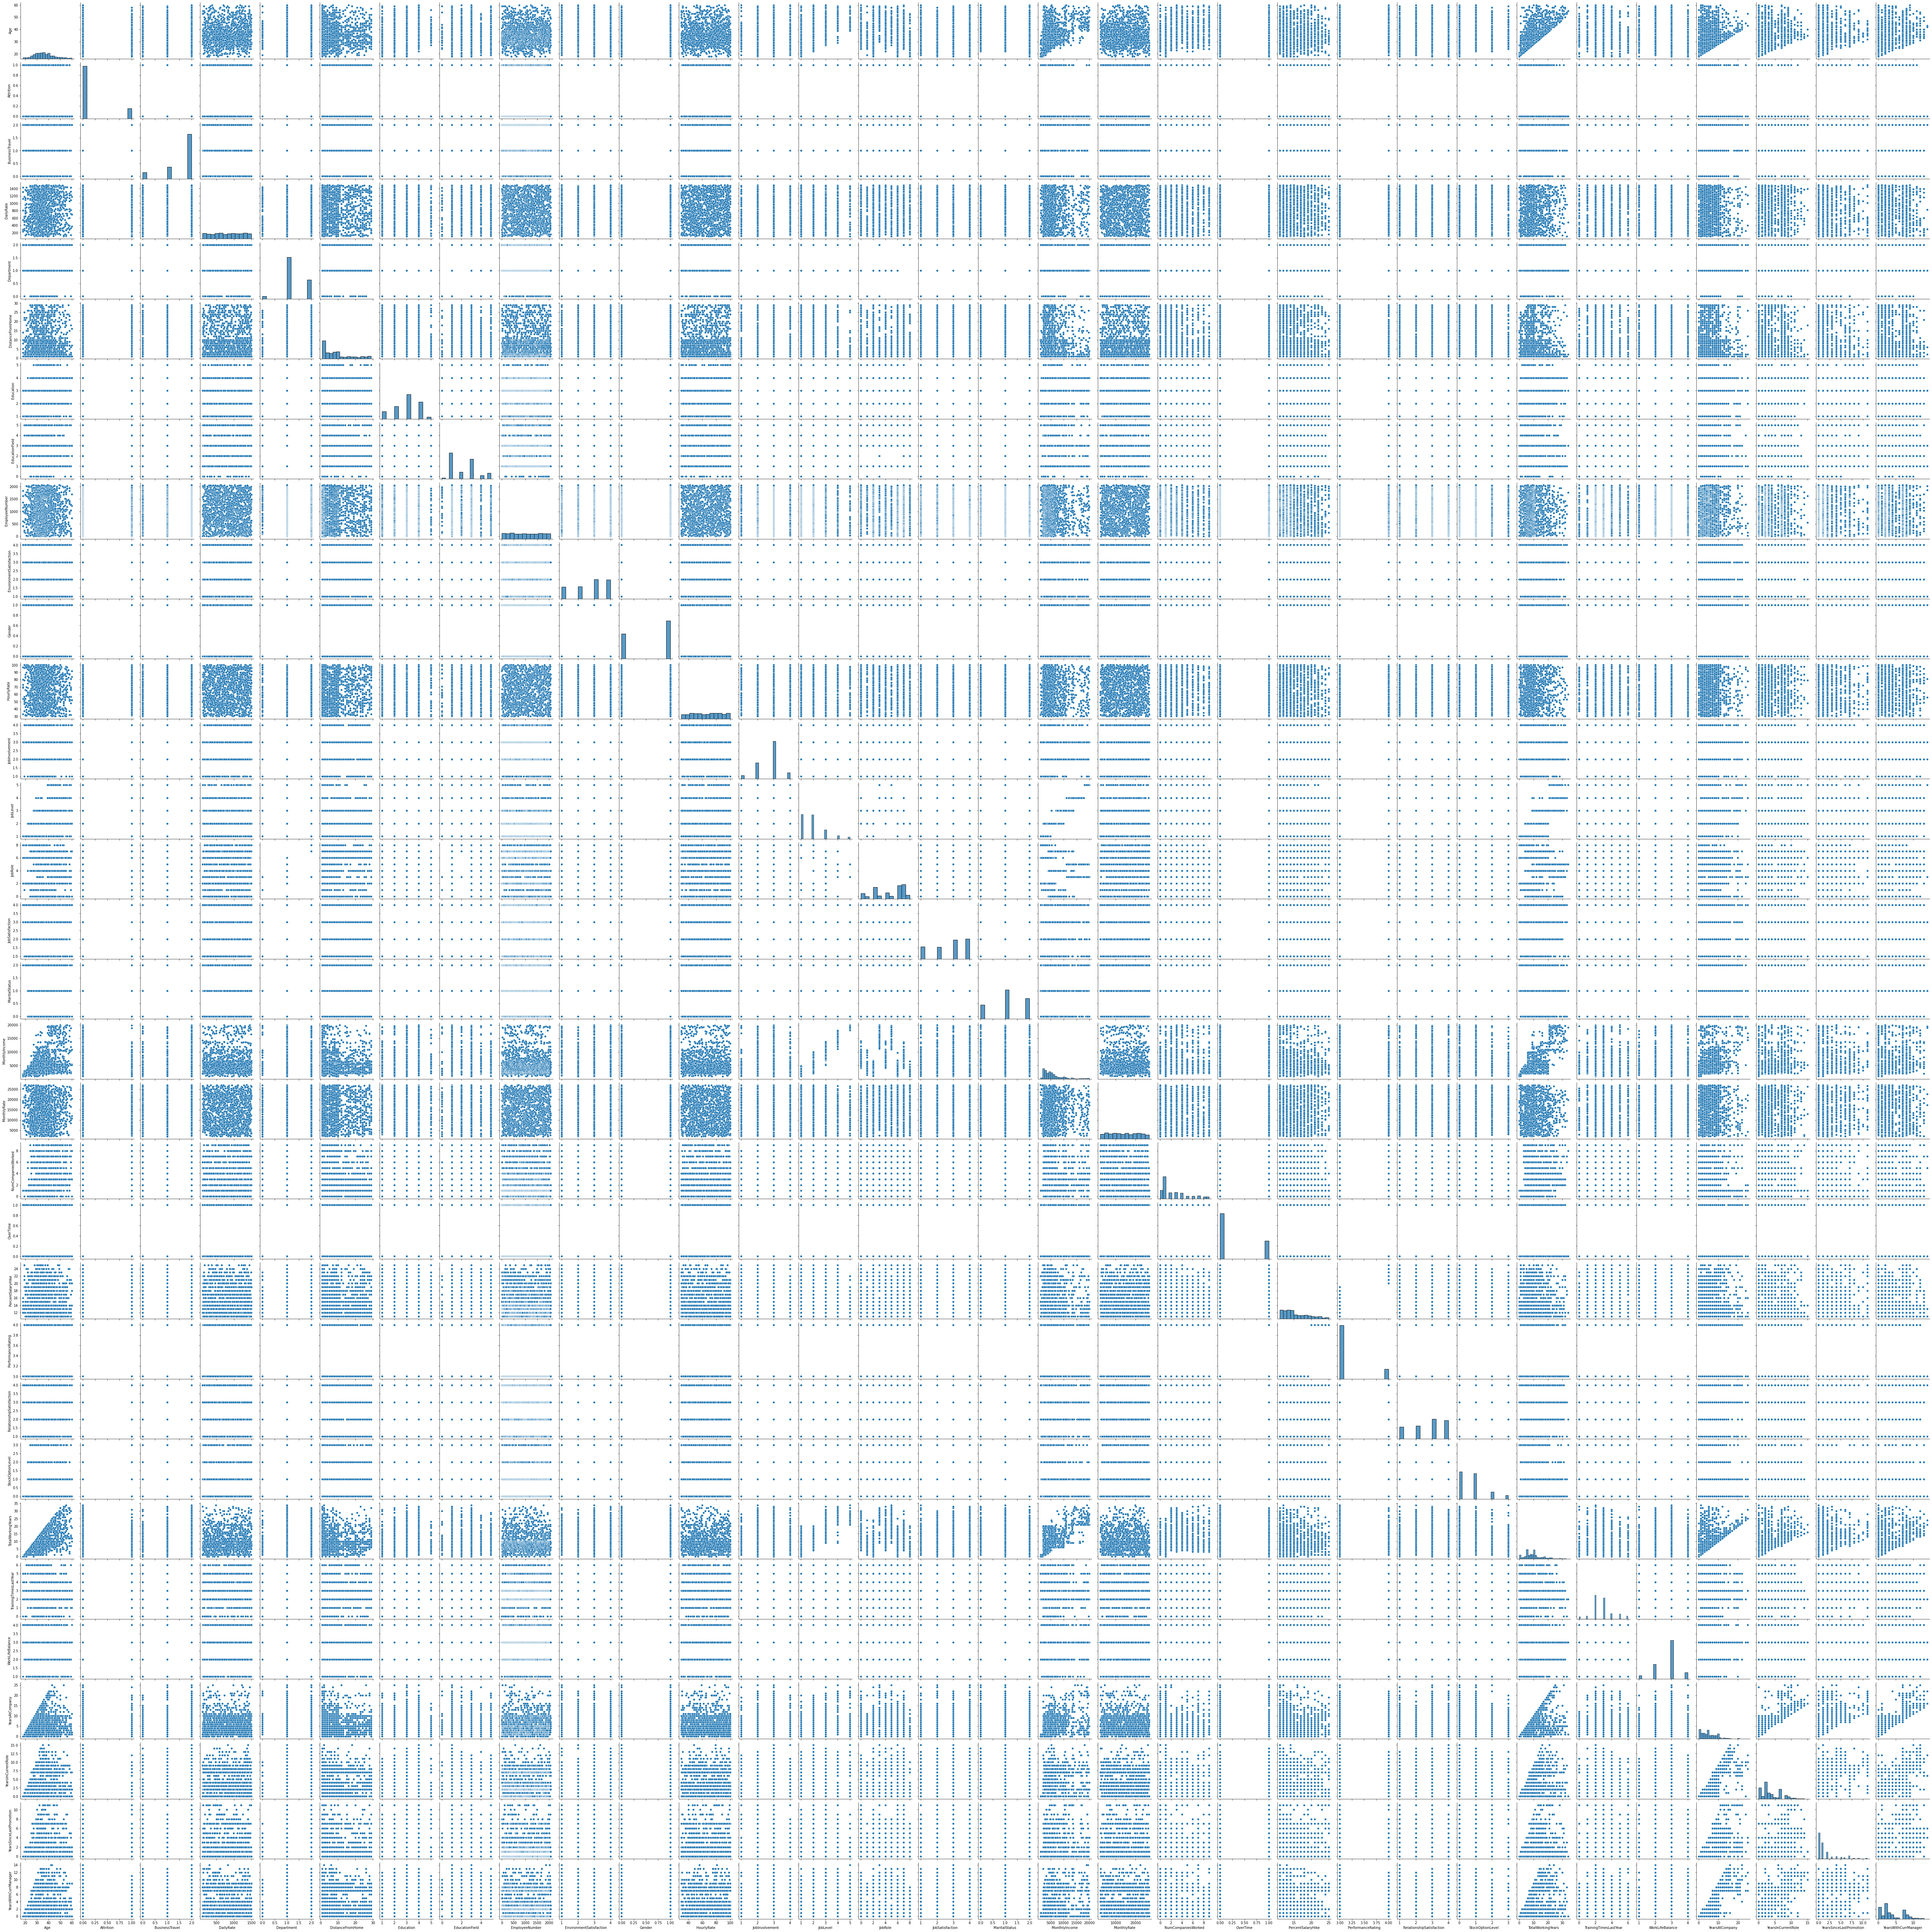

In [45]:
sns.pairplot(df)

Checking for skewness

In [55]:
from scipy.stats import skew

X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [56]:
X.skew()

#since the skewness is between -5 to +5, we do not need to perform any skewness handling operation.

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [57]:
#from sklearn.preprocessing import power_transform
#df_new = power_transform(X)
#df_new = pd.DataFrame(df_new, columns = X.columns)

#df_new.skew()

In [58]:
#checking class imbalance

df['Attrition'].value_counts()

0.0    1158
1.0     229
Name: Attrition, dtype: int64

In [59]:
#upsampling the target variable with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

#handling class imbalance
X, y = smote.fit_resample(X,y)

# Finding best random state

In [54]:
#importing classification models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

#instantiating the imported classifiers

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier() 


In [60]:
#finding best random state for Logistic Regression classifier

lr_acc = 0    
random_state = 0
for i in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>lr_acc:
        lr_acc=acc
        random_state = i
print(f"The best accuracy score {lr_acc} for Logistic regression is achieved at random state {random_state}.")

The best accuracy score 0.7219343696027634 for Logistic regression is achieved at random state 34.


In [63]:
#finding best random state for AdaBoost Classifier

final_acc = 0    
random_state = 0
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=i)
    abc.fit(X_train,y_train)
    y_pred = abc.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy>final_acc:
        final_acc=accuracy
        random_state = i
print(f"The best accuracy score {final_acc} for AdaBoost Classifier is achieved at random state {random_state}.")

The best accuracy score 0.924006908462867 for AdaBoost Classifier is achieved at random state 75.


In [67]:
#finding best random state for Decision Tree Classifier

final_acc = 0    
random_state = 0
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=i)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy>final_acc:
        final_acc=accuracy
        random_state = i
print(f"The best accuracy score {final_acc} for Decision Tree Classifier is achieved at random state {random_state}.")

The best accuracy score 0.8808290155440415 for Decision Tree Classifier is achieved at random state 59.


In [66]:
#finding best random state for Random Forest Classifier

final_acc = 0    
random_state = 0
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=i)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy>final_acc:
        final_acc=accuracy
        random_state = i
print(f"The best accuracy score {final_acc} for Random Forest Classifier is achieved at random state {random_state}.")

The best accuracy score 0.9533678756476683 for Random Forest Classifier is achieved at random state 83.


We have now found best random states for all 4 models. Details as below:
* The best accuracy score 0.7219343696027634 for Logistic regression is achieved at random state 34.
* The best accuracy score 0.924006908462867 for AdaBoost Classifier is achieved at random state 75.
* The best accuracy score 0.8808290155440415 for Decision Tree Classifier is achieved at random state 59.
* The best accuracy score 0.9533678756476683 for Random Forest Classifier is achieved at random state 83.


We will now go for cross validation to handle any overfitting/underfitting problems that may or may not be present.

# Cross validation

In [69]:
from sklearn.model_selection import cross_val_score #importing cross validation module

In [71]:
#finding the best CV value for all 4 models.

#Logistic Regression

for i in range(2,9):
    cv_score = cross_val_score(lr, X,y,cv=i)
    cv_mean = cv_score.mean()
    print(f"Mean of CV score at cv value:{i} is {cv_mean}.")

Mean of CV score at cv value:2 is 0.4360967184801382.
Mean of CV score at cv value:3 is 0.555699481865285.
Mean of CV score at cv value:4 is 0.6001727115716753.
Mean of CV score at cv value:5 is 0.6071106725255083.
Mean of CV score at cv value:6 is 0.6213298791018999.
Mean of CV score at cv value:7 is 0.6238775323367468.
Mean of CV score at cv value:8 is 0.6381487889273356.


In [72]:
#AdaBoost Classifier

for i in range(2,9):
    cv_score = cross_val_score(abc, X,y,cv=i)
    cv_mean = cv_score.mean()
    print(f"Mean of CV score at cv value:{i} is {cv_mean}.")

Mean of CV score at cv value:2 is 0.481433506044905.
Mean of CV score at cv value:3 is 0.5112262521588946.
Mean of CV score at cv value:4 is 0.5569948186528497.
Mean of CV score at cv value:5 is 0.6241034855142623.
Mean of CV score at cv value:6 is 0.668825561312608.
Mean of CV score at cv value:7 is 0.7421142804828605.
Mean of CV score at cv value:8 is 0.7159557332060613.


In [73]:
#Decision Tree Classifier

for i in range(2,9):
    cv_score = cross_val_score(dtc, X,y,cv=i)
    cv_mean = cv_score.mean()
    print(f"Mean of CV score at cv value:{i} is {cv_mean}.")

Mean of CV score at cv value:2 is 0.44818652849740936.
Mean of CV score at cv value:3 is 0.5159758203799655.
Mean of CV score at cv value:4 is 0.6122625215889465.
Mean of CV score at cv value:5 is 0.736211551351754.
Mean of CV score at cv value:6 is 0.7845423143350606.
Mean of CV score at cv value:7 is 0.7978708099554022.
Mean of CV score at cv value:8 is 0.8074319890227897.


In [74]:
#Random Forest Classifier

for i in range(2,9):
    cv_score = cross_val_score(rfc, X,y,cv=i)
    cv_mean = cv_score.mean()
    print(f"Mean of CV score at cv value:{i} is {cv_mean}.")

Mean of CV score at cv value:2 is 0.46459412780656306.
Mean of CV score at cv value:3 is 0.6303972366148533.
Mean of CV score at cv value:4 is 0.7979274611398963.
Mean of CV score at cv value:5 is 0.8610272212705741.
Mean of CV score at cv value:6 is 0.901986183074266.
Mean of CV score at cv value:7 is 0.9119184943958357.
Mean of CV score at cv value:8 is 0.9132755637752058.


The idea is to choose the model having least difference between CV mean and accuracy in order to best handle any overfitting situation. 
We see that Random Forest Classifier has least difference between its accuracy score and CV mean as cv=8. 

Hence Random Forest classifier becomes our best model to proceed with. 

We will not go for hyperparameter tuning to try and improve our model accuracy. 

# Hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV #importinng gridsearchCV 

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .25, random_state= 83 )

#defining parameters

parameters = { 'criterion' : ['gini','entropy'],
              'max_depth' : [2,4,5,7],
              'min_samples_split' : [2,3,4],
              'min_samples_leaf' : [1,2,3],
              'max_features' : ['sqrt','auto','log2']
             }

In [78]:
GSCV = GridSearchCV(rfc, parameters, cv=8) #instantiating GridSearchCV

In [79]:
GSCV.fit(X_train,y_train) #fitting the data

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 7],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [80]:
GSCV.best_params_ #finding best parameters

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [81]:
#Applying Random Forest Classifier on the dataset once again with the newly found best parameters

final_rfc = RandomForestClassifier(criterion= 'gini',
 max_depth= 7,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 4)

In [82]:
#fitting the data

final_rfc.fit(X_train,y_train)
y_pred = final_rfc.predict(X_test)
final_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy score after hyper parater tuning is {final_accuracy}.")

Accuracy score after hyper parater tuning is 0.9395509499136442.


We see that initial accuracy of Random Classifier was 95.33% and after Hyperparameter tuning the accuracy has become 93.95%. This shows the model was initially overfitting and now we have handled that.

# Serialisation

In [85]:
import pickle

In [86]:
filename = 'HR Analytics prediction'
pickle.dump(final_rfc, open(filename, 'wb'))

In [87]:
pickled_rfc_model = pickle.load(open(filename, 'rb'))
pickled_rfc_model.predict(X_test)

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1.